# Housing Prices Data Cleaning

## Import and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset once, specifying "NA" as missing
df = pd.read_csv(r'C:\Users\dayan\OneDrive\Desktop\Housing Prices Dataset.csv', na_values=['NA'])

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0   Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           1   76           21     1596            4            5       1973   
1           2  435           21     1890            4            7       1972   
2           3  490           21     1526            4            8       1970   
3           4  615           21     1491            4            6       1972   
4           5  650           21     1936            4            6       1970   

   YearRemodAdd  MasVnrArea  ExterQual  ...  WoodDeckSF  OpenPorchSF  \
0          1973           0          2  ...         120          101   
1          1972           0          2  ...          88            0   
2          2002           0          2  ...           0            0   
3          1972           0          2  ...          96           24   
4          1970           0          2  ...           0            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea 

## Display summary statistics

In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0           Id  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean   1460.000000  1460.000000    57.766701   10168.114080     6.089072   
std     842.787043   842.787043    33.481636    7886.996359     1.409947   
min       1.000000     1.000000     0.000000    1300.000000     1.000000   
25%     730.500000   730.500000    43.000000    7478.000000     5.000000   
50%    1460.000000  1460.000000    63.000000    9453.000000     6.000000   
75%    2189.500000  2189.500000    78.000000   11570.000000     7.000000   
max    2919.000000  2919.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea    ExterQual  ...  \
count  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000  ...   
mean      5.564577  1971.312778   1978.040425   101.396026     2.396711  ...   
std       1.113131    30.291442     25.462179   178.85

## Check for Missing Values

In [5]:
# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing Values:")
print(df.isnull().sum() / len(df) * 100)


Missing Values per Column:
Unnamed: 0          0
Id                  0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
ExterQual           0
ExterCond           0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu         0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
Encl

## Visualize Outliers with Box Plots

In [6]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set up the figure for multiple box plots
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

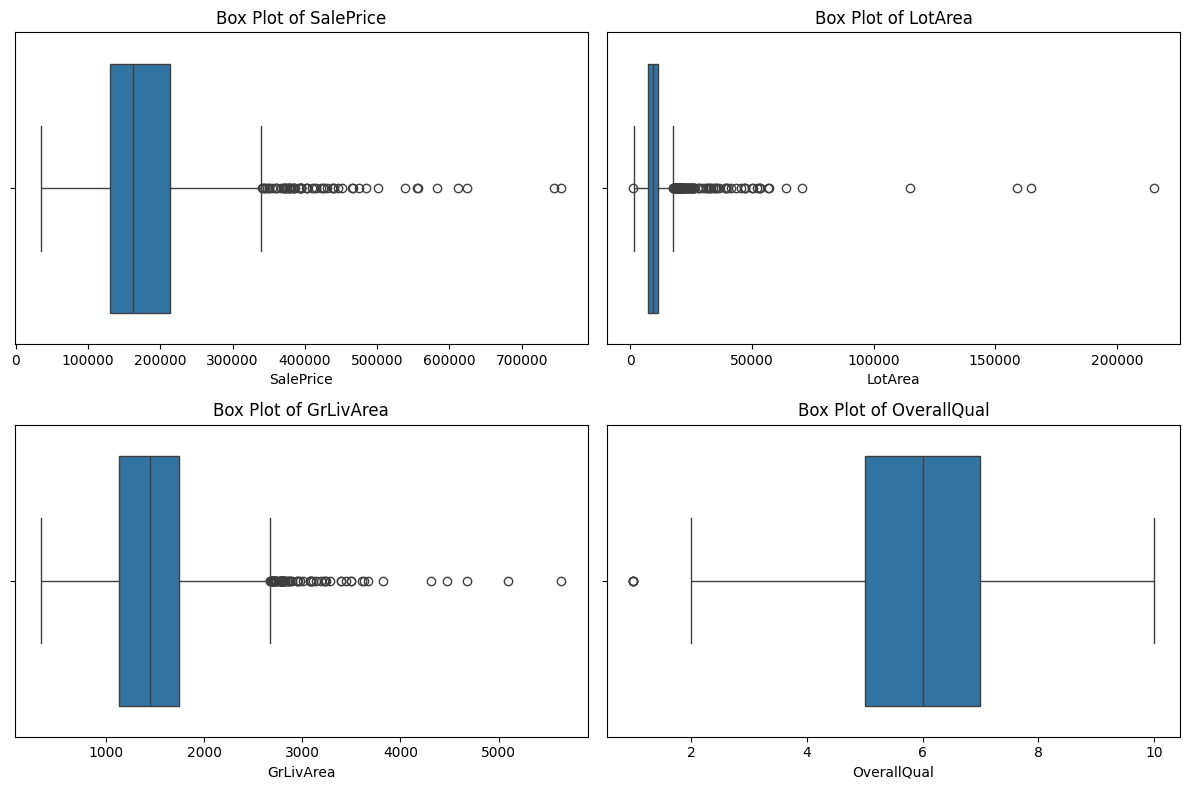

In [8]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple box plots
plt.figure(figsize=(12, 8))

# Box plot for SalePrice
plt.subplot(2, 2, 1)
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of SalePrice')

# Box plot for LotArea
plt.subplot(2, 2, 2)
sns.boxplot(x=df['LotArea'])
plt.title('Box Plot of LotArea')

# Box plot for GrLivArea
plt.subplot(2, 2, 3)
sns.boxplot(x=df['GrLivArea'])
plt.title('Box Plot of GrLivArea')

# Box plot for OverallQual
plt.subplot(2, 2, 4)
sns.boxplot(x=df['OverallQual'])
plt.title('Box Plot of OverallQual')

plt.tight_layout()
plt.show()

## Handling Outliers

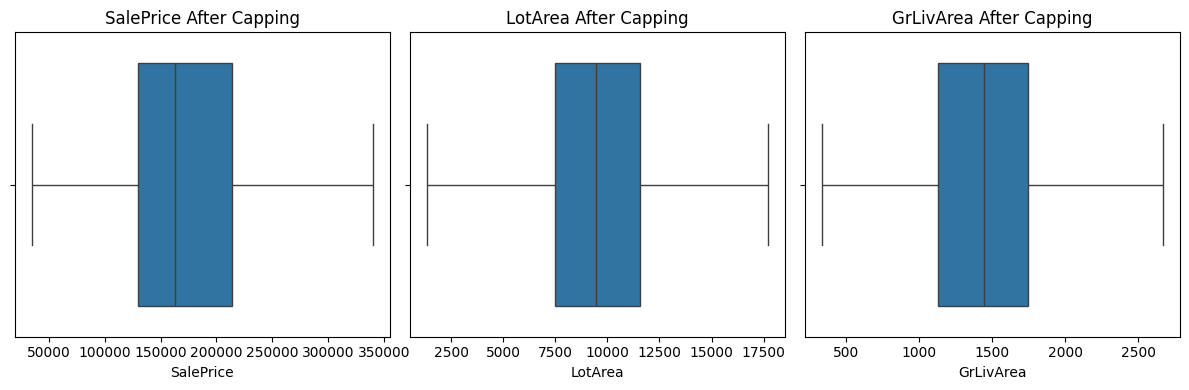

In [9]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply to key columns
df = cap_outliers(df, 'SalePrice')
df = cap_outliers(df, 'LotArea')
df = cap_outliers(df, 'GrLivArea')

# Replot box plots to verify
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice After Capping')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['LotArea'])
plt.title('LotArea After Capping')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['GrLivArea'])
plt.title('GrLivArea After Capping')

plt.tight_layout()
plt.show()

# Handle Missing Values

## Use Regression for Imputation
## Load Data and Prepare Features

In [10]:
# Select features for regression imputation
features = ['LotArea', 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF']

# Split into known and missing SalePrice
df_known = df[df['SalePrice'].notnull()]
df_missing = df[df['SalePrice'].isnull()]

# Display counts
print(f"\nRows with known SalePrice: {len(df_known)}")
print(f"Rows with missing SalePrice: {len(df_missing)}")


Rows with known SalePrice: 1460
Rows with missing SalePrice: 1459


## Train the Regression Model

In [11]:
# Prepare training data
X_train = df_known[features]
y_train = df_known['SalePrice']

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model performance
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score on Training Data: {model.score(X_train, y_train):.2f}")




Model Coefficients:
LotArea: 2.71
OverallQual: 19320.41
GrLivArea: 46.95
YearBuilt: 469.73
TotalBsmtSF: 19.24
Intercept: -983442.01
R² Score on Training Data: 0.83


## Predict Missing SalePrice Values

In [12]:
# Predict missing SalePrice values
X_missing = df_missing[features]
predicted_prices = model.predict(X_missing)

# Add predictions to df_missing
df_missing = df_missing.copy()
df_missing['SalePrice'] = predicted_prices

# Combine known and imputed data
df_cleaned = pd.concat([df_known, df_missing], axis=0).sort_values('Id')

# Verify SalePrice imputation
print("\nMissing Values After Regression Imputation:")
print(df_cleaned.isnull().sum())


Missing Values After Regression Imputation:
Unnamed: 0       0
Id               0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscVal          0
YrSol

#### Why Regression Imputation is Better Here? 
1. Leverages Relationships
2. Preserves Variability
3. Suitable for High Missingness
4. Realistic Estimates

## Handle Other Cleaning

In [13]:
# Replace GarageYrBlt = 0 with YearBuilt
df_cleaned.loc[df_cleaned['GarageYrBlt'] == 0, 'GarageYrBlt'] = df_cleaned.loc[df_cleaned['GarageYrBlt'] == 0, 'YearBuilt']

# Replace MasVnrArea = 0 with median
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].replace(0, df_cleaned['MasVnrArea'].median())

# Verify after additional cleaning
print("\nMissing Values After Additional Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Additional Cleaning:
Unnamed: 0       0
Id               0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscVal          0
YrSold 

# Final Verification

In [14]:
# Final check for missing values
print("\nMissing Values After All Cleaning:")
print(df_cleaned.isnull().sum())

# Final summary statistics
print("\nFinal Summary Statistics:")
print(df_cleaned.describe())


Missing Values After All Cleaning:
Unnamed: 0       0
Id               0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
Fence            0
MiscVal          0
YrSold        

## Save Cleaned Data

In [14]:
# Save the cleaned dataset
df_cleaned.to_csv('housing_prices_cleaned.csv', index=False)
print("Cleaned data saved as 'housing_prices_cleaned.csv'")

Cleaned data saved as 'housing_prices_cleaned.csv'


## Predictive modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF']
X = df_cleaned[features]
y = df_cleaned['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [16]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - R²:", lr_r2)

Linear Regression - MSE: 460133453.4806578
Linear Regression - R²: 0.8959694104385136


## Decision Tree

In [17]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=4)  # Limit depth for visualization
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree - MSE:", dt_mse)
print("Decision Tree - R²:", dt_r2)

Decision Tree - MSE: 871443566.7834941
Decision Tree - R²: 0.8029771855615314


## Add predictions to the dataset (for the entire dataset)

In [18]:
df_cleaned['PredictedSalePrice_LR'] = lr_model.predict(X)
df_cleaned['PredictedSalePrice_DT'] = dt_model.predict(X)

## Calculate residuals

In [19]:
df_cleaned['Residual_LR'] = df_cleaned['SalePrice'] - df_cleaned['PredictedSalePrice_LR']
df_cleaned['Residual_DT'] = df_cleaned['SalePrice'] - df_cleaned['PredictedSalePrice_DT']

## Feature Importance for Decision Tree

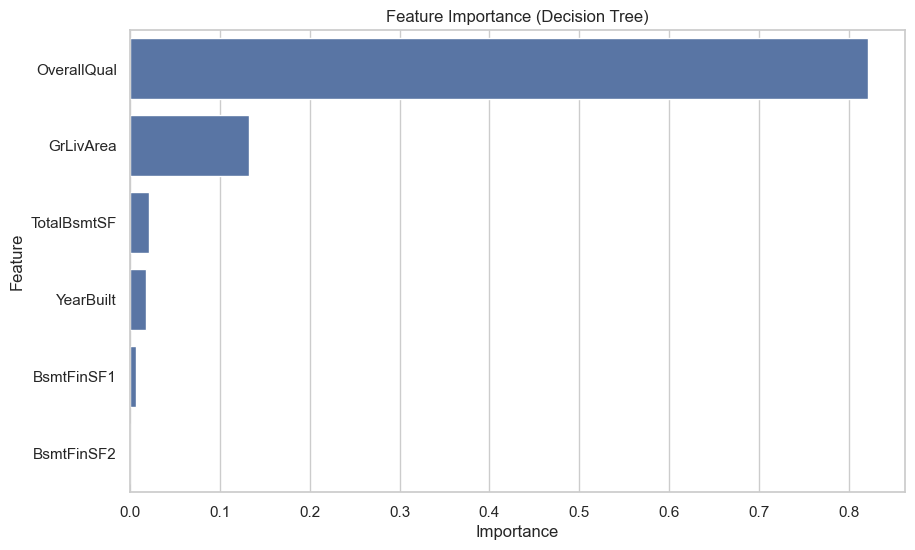

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree  # Ensure plot_tree is imported

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
})
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



## Decision Tree Diagram (Using plot_tree)

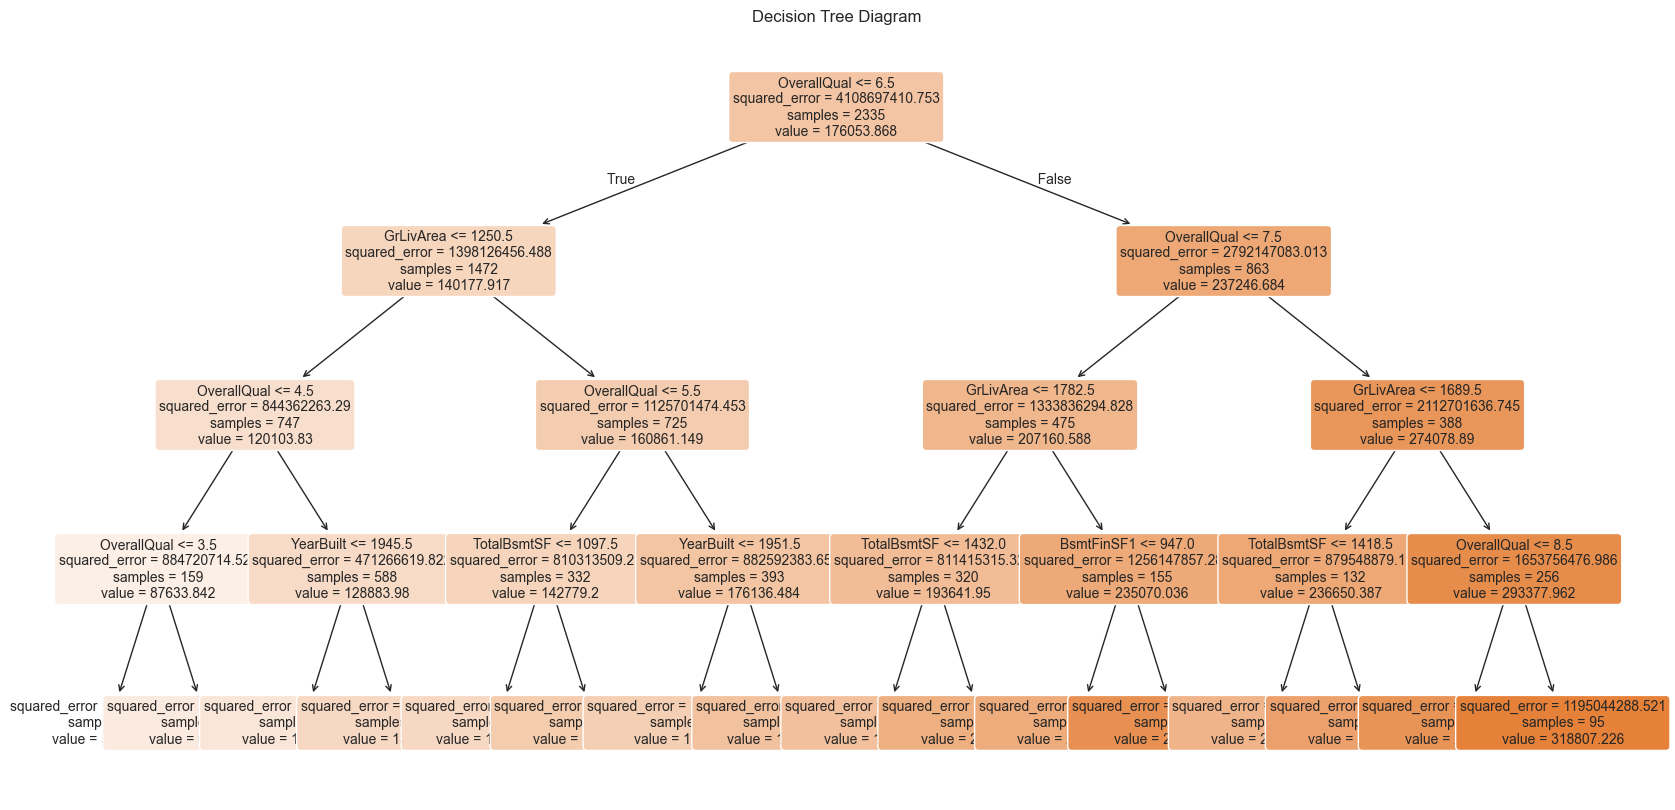

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=features, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Diagram")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')  # Save the diagram as PNG
plt.show()

# --- Visualization 3: Scatter Plot (Actual vs. Predicted) ---
plt.figure(figsize=(14, 6))




## Linear Regression Vs Decision Tree

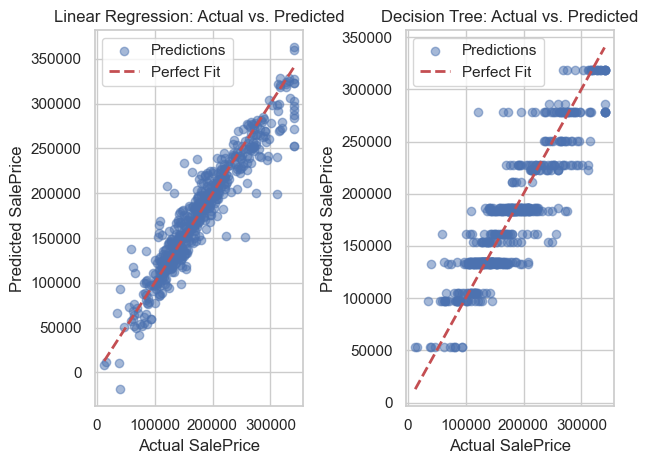

In [22]:
# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Decision Tree: Actual vs. Predicted')
plt.legend()

plt.tight_layout()
plt.show()


## Residual Plots

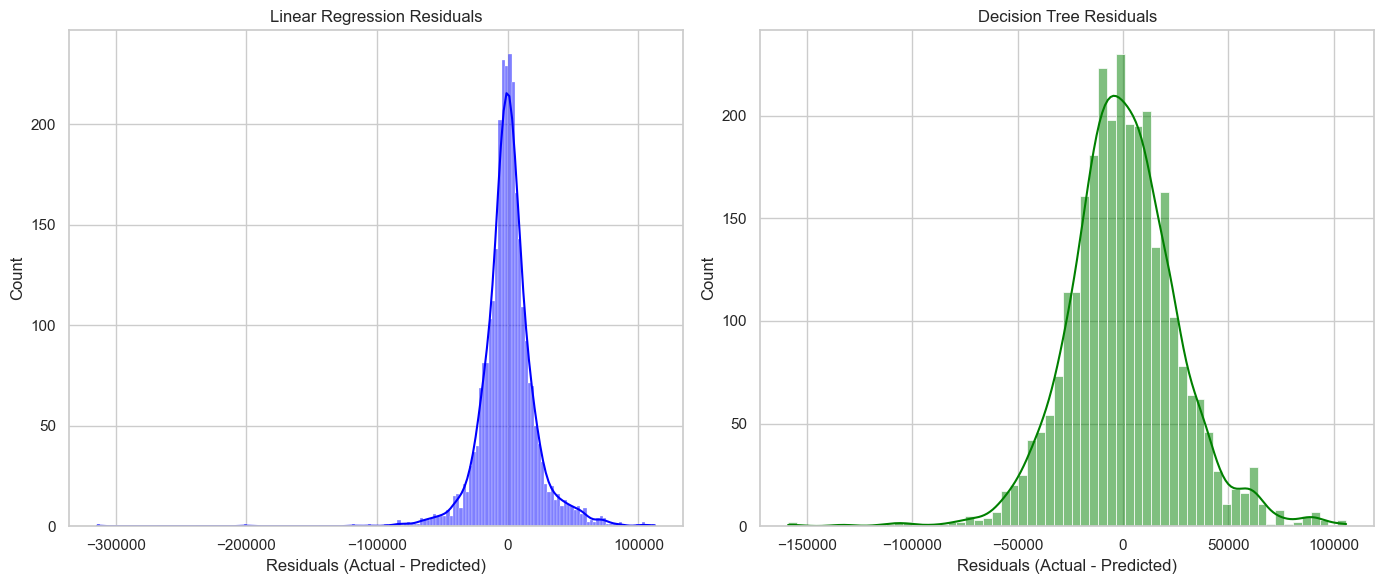

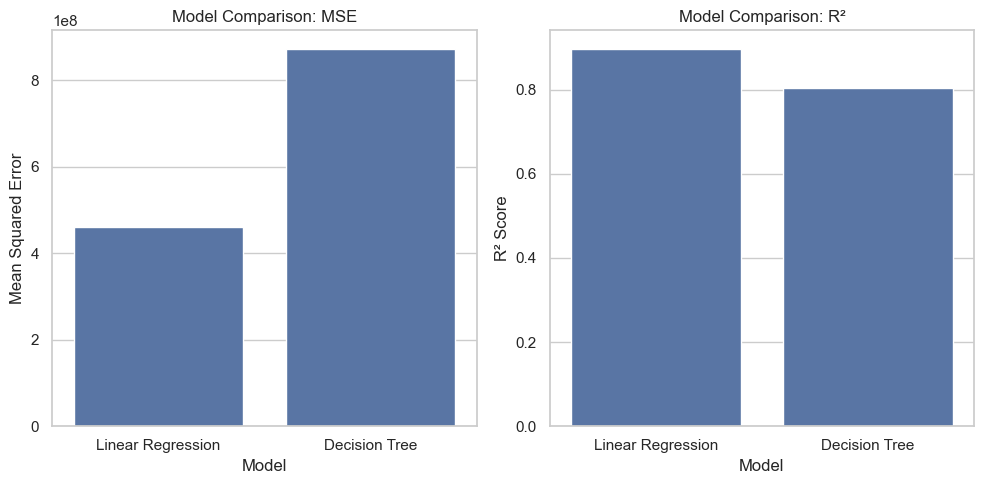

In [23]:
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Residual_LR'], kde=True, color='blue')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Linear Regression Residuals')

# Decision Tree Residuals
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Residual_DT'], kde=True, color='green')
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Decision Tree Residuals')

plt.tight_layout()
plt.show()

# --- Visualization 5: Model Performance Comparison ---
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [lr_mse, dt_mse],
    'R2': [lr_r2, dt_r2]
})

# Plot MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.title('Model Comparison: MSE')
plt.ylabel('Mean Squared Error')

# Plot R²
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2', data=metrics)
plt.title('Model Comparison: R²')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

 ## Create a DataFrame to display actual and predicted values for the test set

In [29]:
test_results = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice (Linear Regression)': lr_predictions,
    'Predicted SalePrice (Decision Tree)': dt_predictions
})

# Reset the index to align the values properly
test_results.reset_index(drop=True, inplace=True)

# Print the first 10 rows of the test set predictions
print("Predicted Values for the Test Set (First 10 Rows):")
print(test_results.head(10))

Predicted Values for the Test Set (First 10 Rows):
   Actual SalePrice  Predicted SalePrice (Linear Regression)  \
0     114250.254704                            120428.562870   
1     204663.836427                            209317.757568   
2     118000.782890                            120920.979459   
3     187500.000000                            202004.540177   
4     239218.246223                            241135.892882   
5     311872.000000                            240490.239536   
6      62238.817318                             68244.859131   
7     260000.000000                            211163.028551   
8     103457.555123                             99844.562503   
9     189102.413863                            183762.521600   

   Predicted SalePrice (Decision Tree)  
0                        134545.090361  
1                        227929.935368  
2                        134545.090361  
3                        183282.787457  
4                        278373.116198 

In [25]:
# Select relevant columns to display
entire_dataset_results = df_cleaned[['Id', 'SalePrice', 'PredictedSalePrice_LR', 'PredictedSalePrice_DT']]

# Print the first 10 rows of the entire dataset predictions
print("Predicted Values for the Entire Dataset (First 10 Rows):")
print(entire_dataset_results.head(10))

Predicted Values for the Entire Dataset (First 10 Rows):
      Id  SalePrice  PredictedSalePrice_LR  PredictedSalePrice_DT
2108   1   208500.0          217817.247163          186651.048802
2357   2   181500.0          172499.516103          183282.787457
2109   3   223500.0          220165.502829          227929.935368
2284   4   140000.0          173158.174205          186651.048802
2693   5   250000.0          267146.171141          278373.116198
1392   6   143000.0          155738.124429          133199.333950
2420   7   307000.0          257851.403312          278373.116198
1862   8   200000.0          232100.910309          227929.935368
239    9   129900.0          184759.068009          186651.048802
623   10   118000.0          121103.205072          105087.277892


In [26]:
# Select relevant columns including residuals
results_with_residuals = df_cleaned[['Id', 'SalePrice', 'PredictedSalePrice_LR', 'PredictedSalePrice_DT', 'Residual_LR', 'Residual_DT']]

# Print the first 10 rows
print("Predicted Values with Residuals for the Entire Dataset (First 10 Rows):")
print(results_with_residuals.head(10))

Predicted Values with Residuals for the Entire Dataset (First 10 Rows):
      Id  SalePrice  PredictedSalePrice_LR  PredictedSalePrice_DT  \
2108   1   208500.0          217817.247163          186651.048802   
2357   2   181500.0          172499.516103          183282.787457   
2109   3   223500.0          220165.502829          227929.935368   
2284   4   140000.0          173158.174205          186651.048802   
2693   5   250000.0          267146.171141          278373.116198   
1392   6   143000.0          155738.124429          133199.333950   
2420   7   307000.0          257851.403312          278373.116198   
1862   8   200000.0          232100.910309          227929.935368   
239    9   129900.0          184759.068009          186651.048802   
623   10   118000.0          121103.205072          105087.277892   

       Residual_LR   Residual_DT  
2108  -9317.247163  21848.951198  
2357   9000.483897  -1782.787457  
2109   3334.497171  -4429.935368  
2284 -33158.174205 -46651.04

In [28]:

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
})
feature_importance.to_csv('feature_importance.csv', index=False)

# Save the dataset with predictions and residuals
df_cleaned.to_csv('housing_prices_with_predictions.csv', index=False)

# Save model performance metrics
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [lr_mse, dt_mse],
    'R2': [lr_r2, dt_r2]
})
metrics.to_csv('model_performance_metrics.csv', index=False)

print("Predictions, residuals, feature importance, and model performance metrics have been saved.")

Predictions, residuals, feature importance, and model performance metrics have been saved.


## Save feature importance

In [27]:
# Print predictions for specific rows
specific_rows = df_cleaned[df_cleaned['Id'].between(1, 5)][['Id', 'SalePrice', 'PredictedSalePrice_LR', 'PredictedSalePrice_DT']]
print("Predicted Values for Id 1 to 5:")
print(specific_rows)

Predicted Values for Id 1 to 5:
      Id  SalePrice  PredictedSalePrice_LR  PredictedSalePrice_DT
2108   1   208500.0          217817.247163          186651.048802
2357   2   181500.0          172499.516103          183282.787457
2109   3   223500.0          220165.502829          227929.935368
2284   4   140000.0          173158.174205          186651.048802
2693   5   250000.0          267146.171141          278373.116198
